# Jupyter Exercise

Here is a Markdown cell.  You can use Latex commands like $f(x)=\frac{1}{x}$.  

This exercise follows the tutorial posted at https://www.dataquest.io/blog/jupyter-notebook-tutorial/

In the tutorial, we will plot some data.  It will give an idea of the python syntax.

We will begin by writing a simple function:

print('Hello monddde'

In [148]:
import time
time.sleep(3)

In [149]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

In [150]:
say_hello('Cyrus')

'Hello, Cyrus!'

Now let's import some packages and try fancier things:

In [151]:
import numpy as np
def square(x):
    return x * x

In [152]:
x = np.random.randint(1,10)
y = square(x)
print('%d squared is %d' %(x,y))

4 squared is 16


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [154]:
df = pd.read_csv('documents/github/cds-demos/jupyter/fortune500.csv')

In [155]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [156]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [157]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [158]:
len(df)

25500

In [159]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Problem here is that the `profit` variable is not numeric.  We can pull those out and see what is going on. We create an object that has the locations of non-numeric values.  Then we see what they look like:

In [160]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Let's see what all the non-numeric strings are:

In [161]:
set(df.profit[non_numberic_profits])

{'N.A.'}

Make a histogram to see what share of observations per year are `N.A.`:

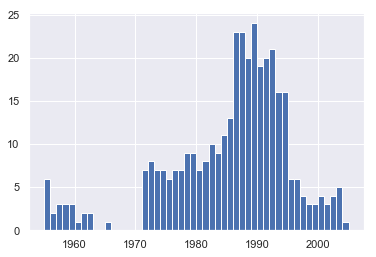

In [162]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

Now we remove these observations:

In [163]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)
len(df)
df.head()
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Now we will try to plot average profits per year.

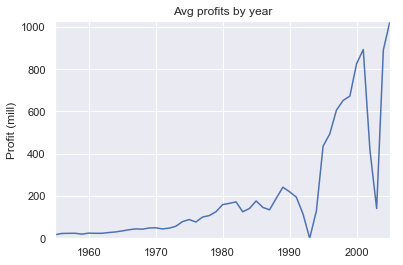

In [164]:
group_by_year = df.loc[:, ['year','revenue','profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)
fig, ax=plt.subplots()
plot(x, y, ax, 'Avg profits by year', 'Profit (mill)')

Now we can also plot plus/minus 1 sd:

In [165]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y-2*stds, y+2*stds, alpha=0.2)
    plot(x,y,ax, title, y_label)

In [166]:
stds1 = group_by_year.std().profit

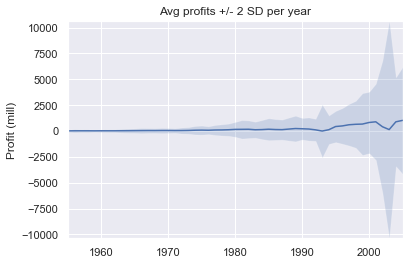

In [167]:
fig, ax = plt.subplots(ncols=1)
plot_with_std(x, y, stds1, 
              ax, 
              'Avg profits +/- 2 SD per year',
              'Profit (mill)')